In [ ]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env

from meta.custom_env import CustomEnv
from utils.fetch_data import fetch_data

data = fetch_data('BTC-USD', '2018-01-01', '2023-01-01')

env = CustomEnv(data, action_spece=3, observation_space=5)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=100000, log_interval=1000)

[*********************100%***********************]  1 of 1 completed


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.1e+03  |
|    ep_rew_mean     | 340      |
| time/              |          |
|    fps             | 501      |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 2048     |
---------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 1.1e+03       |
|    ep_rew_mean          | 434           |
| time/                   |               |
|    fps                  | 382           |
|    iterations           | 2             |
|    time_elapsed         | 10            |
|    total_timesteps      | 4096          |
| train/                  |               |
|    approx_kl            | 0.012930786   |
|    clip_fraction        | 0.281         |
|    clip_range           | 0.2       

[*********************100%***********************]  1 of 1 completed

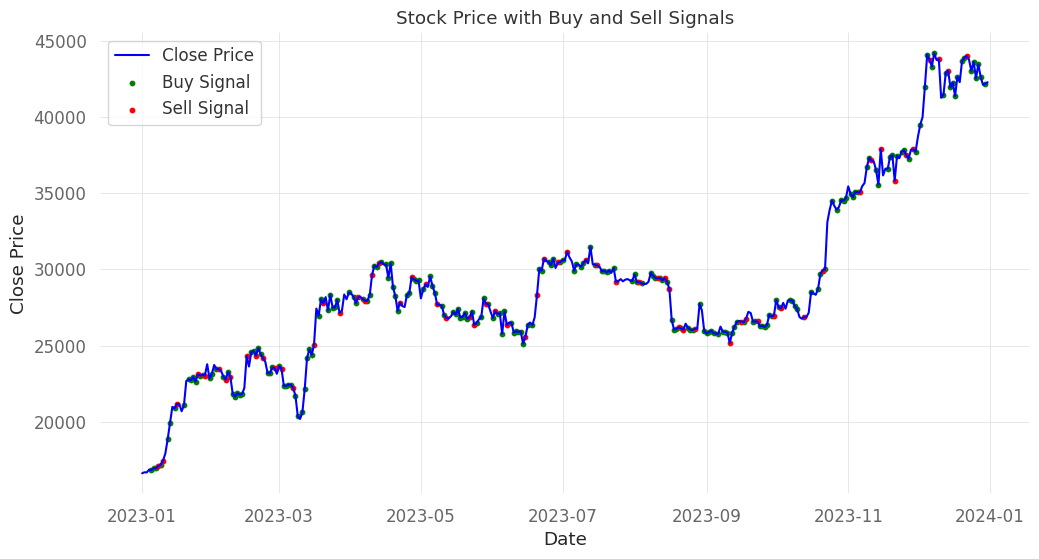

                    Strategy
------------------  ----------
Start Period        2023-01-01
End Period          2023-12-30
Risk-Free Rate      0.0%
Time in Market      69.0%

Cumulative Return   17.07%
CAGR﹪              11.56%

Sharpe              1.45
Prob. Sharpe Ratio  97.1%
Sortino             2.6
Sortino/√2          1.84
Omega               1.46

Max Drawdown        -6.89%
Longest DD Days     243

Gain/Pain Ratio     0.46
Gain/Pain (1M)      3.08

Payoff Ratio        1.39
Profit Factor       1.46
Common Sense Ratio  2.07
CPC Index           1.04
Tail Ratio          1.42
Outlier Win Ratio   7.19
Outlier Loss Ratio  4.33

MTD                 4.01%
3M                  6.51%
6M                  4.35%
YTD                 17.07%
1Y                  17.07%
3Y (ann.)           11.56%
5Y (ann.)           11.56%
10Y (ann.)          11.56%
All-time (ann.)     11.56%

Avg. Drawdown       -1.04%
Avg. Drawdown Days  23
Recovery Factor     2.35
Ulcer Index         0.04
Serenity Index      0.34


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


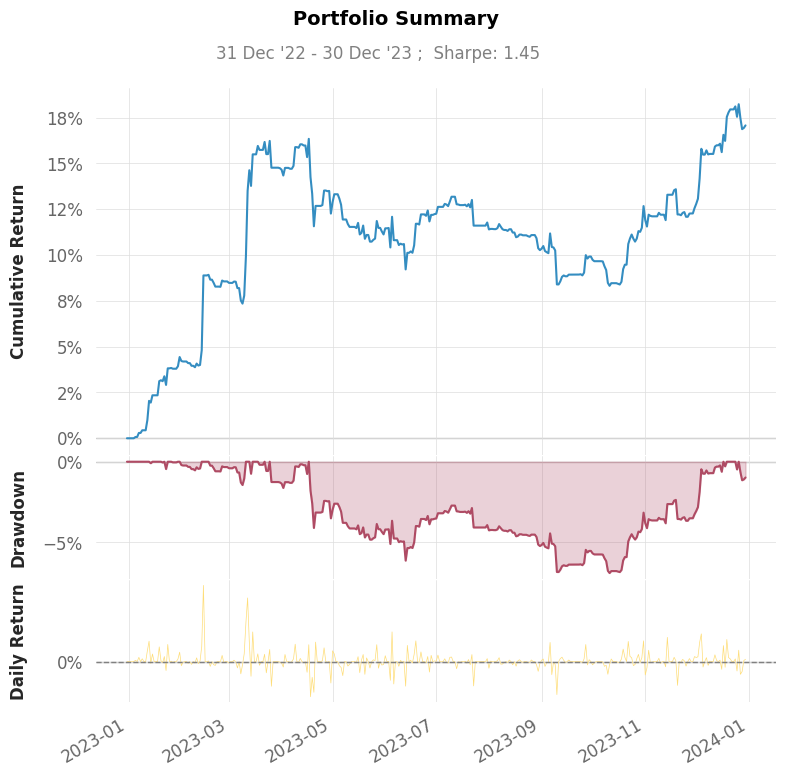

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


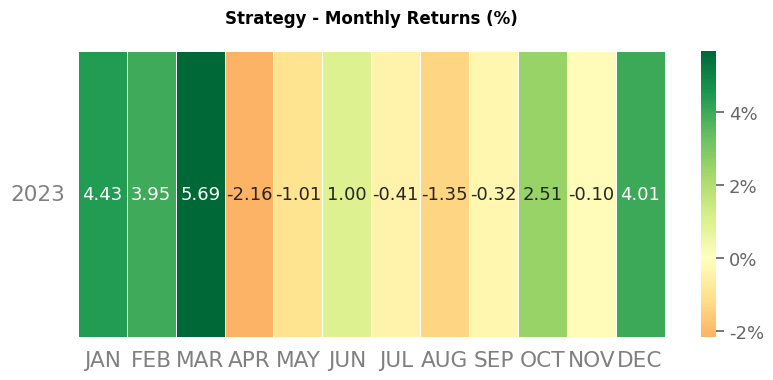

In [ ]:
import pandas as pd
import quantstats as qs
from utils.plot_buy_and_sell import plot_buy_and_sell

test_data = fetch_data('BTC-USD', '2023-01-01', '2024-01-01')

test_env = CustomEnv(test_data, action_spece=3, observation_space=5)
check_env(test_env)

portfolio_values = []

observation, info = test_env.reset()

while True:
    action, _states = model.predict(observation)

    observation, reward, terminated, truncated, info = test_env.step(action)
    done = terminated or truncated
    env.render()
    portfolio_values.append(info['portolio_value'])

    if done:
        break

actions_data = test_env.close()
actions_data.index = pd.to_datetime(test_data.index)

plot_buy_and_sell(actions_data)

dates = pd.date_range(start=test_data.index[0], periods=len(portfolio_values), freq="D")
portfolio_series = pd.Series(portfolio_values, index=dates)

returns = portfolio_series.pct_change().fillna(0)

qs.reports.basic(returns)